# Missing Data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
path = "../data/covid_survey_samp.csv"
survey = pd.read_csv(path)
survey.head(60) 



In [ ]:
#A trick we will use later to visualize missing data
sns.heatmap(survey.isnull(),yticklabels=False,cbar=False)



## Deleting Rows with Missing Values

In [ ]:
survey_noNA = survey.dropna()
survey_noNA.describe()


## Filling in Missing Values


In [ ]:
# first lets fix things that say missing in our data set
survey.replace(r'MISSING', np.NaN, regex=True, inplace= True)
survey

## Imputing Numeric Values

### Impute with a 0

In [ ]:
survey_zero = survey.fillna(0)
survey_zero

### Impute the MEAN or MEDIAN

In [ ]:
survey_means = survey.fillna(survey.mean(numeric_only=True))
survey_means

In [ ]:
survey_median = survey.fillna(survey.median(numeric_only=True))
survey_median

## Imputing Categorical Values

Obviously means and medians don't make sense for our missing values that are categories

### Relabel them as something else

Use a place holder such as "no_response"

In [ ]:
survey_nr = survey.fillna("no_response")
survey_nr

### Use the most common response, and assume NaN's are this class

In [ ]:
# get the most common value by column.
# Lambda functions are new...

survey_freq = survey.apply(lambda x: x.fillna(x.value_counts().index[0]))
survey_freq 

## Choosing the columns to treat

In [ ]:
# this only solves for the numerical values, then you could run the Lambda process for categorical values
survey['age'] = survey['age'].fillna(survey['age'].mean())
survey['income'] = survey['income'].fillna(survey['income'].median())
survey

## Optional -- Additional fill approaches

The text covers some other interesting options. Try applying these to this data set. 


In [ ]:
# forward-fill. The below will need to be adjusted to work on this data set
data.fillna(method='ffill')

In [ ]:
# back-fill. The below will need to be adjusted to work on this data set
data.fillna(method='bfill')

# Time series

Pandas was developed with financial data in mind, so it makes sense to explore some financial data first. Before we get there... lets talk dates. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import datetime
basic_date = datetime.date(1955, 11, 5)
basic_date


In [ ]:
basic_date.day

In [ ]:
basic_date.month

In [ ]:
basic_date.year

In [ ]:
today = datetime.datetime.now()
today


## Using regular sequences

This example is based on the time series code in:

VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc.  available online at https://jakevdp.github.io/PythonDataScienceHandbook/


### Creating a sequence of dates

In [ ]:
pd.date_range('2020-08-01', '2020-08-15')

In [ ]:
pd.date_range('2020-08-01', periods=15)

In [ ]:
pd.date_range('2020-08-01', periods=24, freq='H')

In [ ]:
pd.period_range('2020-01', periods=15, freq='M')

In [ ]:
pd.date_range('2020-01', periods=15, freq='M')

In [ ]:
pd.timedelta_range(0, periods=24, freq='H')

In [ ]:
pd.timedelta_range(0, periods=24, freq='H')[1]

## Create a column of date time in a data frame

Pandas does a pretty good job recognizing dates, but sometimes you need to tell it what to look for. This table shows some the code you can use to parse dates in Pandas.

Lets take the date : 26-10-1985, that is October 26, 1985. 

ref | refers to | for 26-10-1985: returns
----|------------|-------
%d  |day of the month. | %d returns 26.
%m  |month of the year.| %m returns 10.
%Y |year (*note the uppercase Y*) | %Y returns 1985.
%y |year in two-digit format (*note the lowercase y*)| %y returns 85.

In [ ]:
path = "../data/BunchOfDates.csv"
dat = pd.read_csv(path)
dat.head(10)

In [ ]:
dat.info()

In [ ]:
dat['date1'] = pd.to_datetime(dat['date1'])
dat['date1'] 

In [ ]:
dat.info()

Let's imagine that date2 won't be read automagically (it will, we are pretending). To change that date string to a pandas date time we will tell pandas how it is organized.

In [ ]:
dat['date2']

In [ ]:
# https://docs.python.org/3/library/datetime.html


#oops
#dat['date2_fixed'] = pd.to_datetime(dat['date2'], format='%m/%d/%Y %H:%M')

#fix it
dat['date2_fixed'] = pd.to_datetime(dat['date2'], format='%d-%b-%y %H:%M')

In [ ]:
#first lets look at the date in that column.

dat['date2'] = pd.to_datetime(dat['date2'])

In [ ]:
dat.info()

## Optional -- Using an API to get some data 
If you want to try your hand at using an API such as the one available from Alpha Vantage, some boilerplate code is available below. 

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
import config

In [ ]:

ts = TimeSeries(key=config.api_key,output_format='pandas')
data, meta_data = ts.get_intraday(symbol='ZM',interval='15min', outputsize='full')
print(data)
data['4. close'].plot()
plt.title('Intraday TimeSeries Zoom')
plt.show()

So thats how you would use an API to get the data off a site like Alpha Advantage. Those kinds of "calls" have advangages, especially if you are trying to make something re-usable. 

## Optional -- Importing and looking at a time series

Note that we will come back to this idea in later (non-optional) series later in the course. 

For the rest of this tutorial, I will import static data (in the files), so you can reproduce the results if you wish.  



In [ ]:
# load csv of "ZM"(Zoom) data
# this is stock data in 15 min increments. 

import pandas as pd
import matplotlib.pyplot as plt

path = "../data/zm15.csv"
zm15 = pd.read_csv(path)
zm15.head()

In [ ]:
zm15.info()

In [ ]:
zm15.timestamp

From the view above... our datatime column is not a date or time, it is a string!

Automated date time:

In [ ]:
zm15['timestamp'] = pd.to_datetime(zm15['timestamp'])
zm15['timestamp'] 

Using a formatting string

In [ ]:
# just like last time, if we needed to we could pass this a format string (we don't need to)
#zm15['timestamp'] = pd.to_datetime(zm15['timestamp'], format=' %Y - %m- %d %H')

In [ ]:
zm15['timestamp'][0]

In [ ]:
zm15['close'].plot()
plt.title('Intraday TimeSeries Zoom')
plt.show()

In [ ]:
zm15.set_index('timestamp', inplace = True) 
zm15

In [ ]:
zm15['close'].plot()
plt.title('Intraday TimeSeries Zoom')
plt.show()

In [ ]:
zm15.info()

In [ ]:
print(zm15.index.max())
print(zm15.index.min())
print(zm15.index.max() - zm15.index.min())

Perhaps looking at this every 15 minutes is overkill... we could roll this up to different time periods. Even though for this data that doesn't make a lot of sense.

In [ ]:
# look at year (not useful for this sample!)
zm15.resample(rule = 'A').mean()

In [ ]:
# Looking at days
zm15.resample(rule = 'D').mean()

In [ ]:
#weekdays
zm15.resample(rule = 'B').mean()

In [ ]:
#weeks
zm15.resample(rule = 'W').max()

In [ ]:
#qtrs...
zm15.resample(rule = 'SM').mean()

Resampling is cool... but it hardly makes sense in this context. 

In [ ]:
zm15.head(20)

In [ ]:
zoom_daily = zm15.resample('B').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'})
zoom_daily.info()

In [ ]:
zoom_daily

In [ ]:
zm15['close'].resample(rule = 'B').max().plot(kind = 'line', figsize = (10,5))
plt.title('Daily mean close price for Zoom')

#### OHLC Example (Optional)

To run the below you need to have the plotly package installed. 

In [ ]:
import plotly.graph_objects as go
import pandas as pd

#this package plays better without the datetime index
zoom_daily = zoom_daily.reset_index()

zoom_daily.head()
zoom_daily.info()


In [ ]:
figure = go.Figure(data=go.Ohlc(x=zoom_daily['timestamp'],
                    open=zoom_daily['open'],
                    high=zoom_daily['high'],
                    low=zoom_daily['low'],
                    close=zoom_daily['close']))
figure.show()

## Optional -- Working with date data

Let's move to a larger data set, with daily data. 

In [ ]:
# load csv of "GSPC"(S&P) data
# if the dates need to be adjusted, they can be parsed in here or as a later step... we will use a 2 step process. 
import pandas as pd
import matplotlib.pyplot as plt

path = "../data/GSPC.csv"
sp = pd.read_csv(path)
sp['Date'] = pd.to_datetime(sp['Date'])
sp.head()

In [ ]:
sp.describe()

In [ ]:
sp['Date'].dt.day_name()

In [ ]:
sp['Weekday'] = sp['Date'].dt.day_name()
sp.head(10)

In [ ]:
sp['Date'].max() - sp['Date'].min()

In [ ]:
# Index the date
sp.set_index('Date', inplace = True) 


In [ ]:
sp.info()
sp.head()

In [ ]:
sp['Close'].resample(rule = 'W').mean().plot(kind = 'bar', figsize = (15,5))
plt.title('Weekly mean close price for S&P')

In [ ]:
sp['Close'].resample(rule = 'W').mean().plot(kind = 'line', figsize = (15,5))


### Selecting dates

Our date time is NOT an index right now..


In [ ]:
path = "../data/GSPC.csv"
sp = pd.read_csv(path)


sp['Date'] = pd.to_datetime(sp['Date'])
sp.head()



In [ ]:
filter_sp = (sp['Date'] >= '2018')
sp.loc[filter_sp]

In [ ]:
filter_sp = (sp['Date'] >= '2018') & (sp['Date'] < '2019')
sp.loc[filter_sp]

In [ ]:
filter_sp = (sp['Date'] == '2018-12-27') 
sp.loc[filter_sp]

So that is selecting when Date is not an index... if you've indexed date the procedure is just as straightforward. Instead of using .loc, you can just use a slice on the index. 

In [ ]:
sp.set_index('Date', inplace = True) 

sp['2018-01':'2018-12']

Altertnative to going back and forth on the index


In [ ]:
path = "../data/GSPC.csv"
sp = pd.read_csv(path)
sp.head()
sp['Date'] = pd.to_datetime(sp['Date'])


In [ ]:
sp.set_index('Date', drop = False, inplace = True) 
sp

## Optional -- Moving time

Indexed time series can be shifted along the index. For example, maybe we want to move the entire index by some small amount. This is easier to demonstrate with a small sample, so the below subset our data frame. 



In [ ]:
#the DateTimeIndex has some nice properties, it is easier to subset for one!

example = sp.loc['2020-07-01':'2020-07-10', [ 'Open', 'Close']]
example.head(10)
raw = sp.loc['2020-07-01':'2020-07-10', [ 'Open', 'Close']]


In [ ]:
from IPython.display import display_html
def sidetable(x1, x2):
    dfleft = x1.style.set_table_attributes("style='display:inline'").set_caption('Adjusted')
    dfright = x2.style.set_table_attributes("style='display:inline'").set_caption('Original')
    return display_html(dfleft._repr_html_() + dfright._repr_html_(), raw = True)

In [ ]:
sidetable(example, raw)

### Moving back in time


In [ ]:
back = example.shift(-1)

In [ ]:
sidetable(back, raw)

### Moving forward in time

In [ ]:
fwd = example.shift(1)
sidetable(fwd,raw)

### Rolling time periods

In [ ]:
# Back to the full data set

sp['Close'].head(35)

In [ ]:
rolled = sp.rolling(window=5).mean()['Close']
rolled.head(35)

In [ ]:
sp.rolling(window=1).mean()['Open'].plot(figsize=(16, 6))

# Outliers

Let's take a look at a fake data set... to get us started.

In [1]:

import pandas as pd
  
# create a list of lists
data = [['Bill', 28], ['Susie', 41], ['Beth', 224], ['Fareed', 39], ['Pete', 76], ['Cris', 54]]
  
# Create the pandas DataFrame
income = pd.DataFrame(data, columns=['Name', 'IncomeInK'])
income

,Name,IncomeInK
0,Bill,28
1,Susie,41
2,Beth,224
3,Fareed,39
4,Pete,76
5,Cris,54


In [3]:
income['numberOfcats'] = [8,3,0,0,1,0]
income

,Name,IncomeInK,numberOfcats
0,Bill,28,8
1,Susie,41,3
2,Beth,224,0
3,Fareed,39,0
4,Pete,76,1
5,Cris,54,0


In [4]:
income['HomePriceInK'] = [178,-200,1314,312, 280, 341]
income

,Name,IncomeInK,numberOfcats,HomePriceInK
0,Bill,28,8,178
1,Susie,41,3,-200
2,Beth,224,0,1314
3,Fareed,39,0,312
4,Pete,76,1,280
5,Cris,54,0,341


In [5]:
income.describe()

,IncomeInK,numberOfcats,HomePriceInK
count,6.000000,6.000000,6.000000
mean,77.000000,2.000000,370.833333
std,73.864741,3.162278,503.030980
min,28.000000,0.000000,-200.000000
25%,39.500000,0.000000,203.500000
50%,47.500000,0.500000,296.000000
75%,70.500000,2.500000,333.750000
max,224.000000,8.000000,1314.000000


In [6]:
income.median()

/var/folders/jj/vhzjgmld30s622_zd423wg8867f3y5/T/ipykernel_44074/4293500050.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  income.median()


IncomeInK        47.5
numberOfcats      0.5
HomePriceInK    296.0
dtype: float64

In [7]:
#a more python way of doing that
income['HomePriceInK'].median()

296.0

In [8]:
# np.where
import numpy as np
median = income.loc[income['HomePriceInK'] > 0, 'HomePriceInK'].median()
income['HomePriceInK'] = np.where(income['HomePriceInK'] < 0, median, income['HomePriceInK'])
income.head()

,Name,IncomeInK,numberOfcats,HomePriceInK
0,Bill,28,8,178.0
1,Susie,41,3,312.0
2,Beth,224,0,1314.0
3,Fareed,39,0,312.0
4,Pete,76,1,280.0


In [ ]:
##an alternate way to do this
median = income.loc[income['HomePriceInK'] > 0, 'HomePriceInK'].median()
income.loc[income.HomePriceInK < 0, 'HomePriceInK'] = np.nan
income.fillna(median,inplace=True)
income.head()

## A More Realistic Data Set with Outliers

Let's look at a better data set. For this example... we are headed way back to the Titanic. It is an iconic data set in data science. For many years it was the go to data set to learn about various techniques. Over time, the popularity of it in classes like this and online made it a bit of cliche. But as I get older, I find myself getting more nostalgic for my data youth, and so I am reprising it here for you. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})



In [24]:
titanic = pd.read_csv('../data/titanic.csv')

In [17]:
titanic.info()
#there are lots of explanations of each of these columns online. Go find them if you need more detail
titanic.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
1,1,0,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,NaN,NaN,"Haverford, PA / Cooperstown, NY"
2,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
3,1,0,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C,NaN,122.0,"Lexington, MA"
4,1,1,"Spedden, Mr.. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"
5,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
6,1,0,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,NaN,NaN,"Elkins Park, PA"
7,2,1,"Mallet, Mr.. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,10,NaN,"Paris / Montreal, PQ"
8,3,0,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,NaN,C,NaN,NaN,"Syria Ottawa, ON"
9,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,14,NaN,"Lakewood, NJ"


In [12]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<AxesSubplot:>

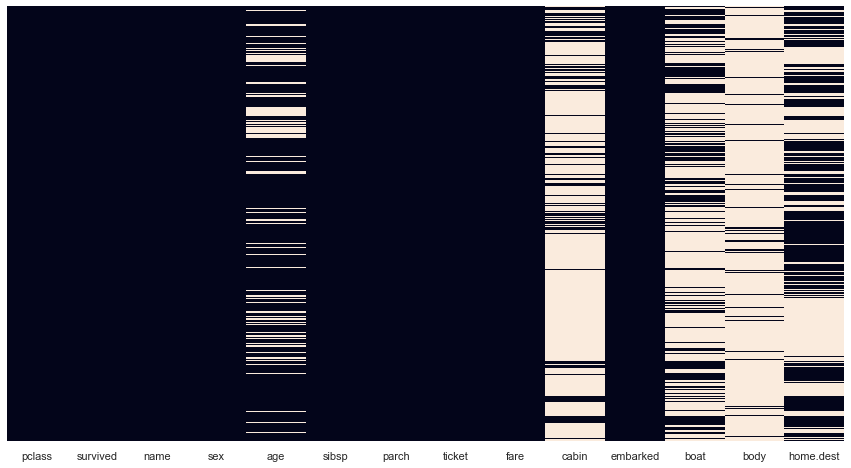

In [18]:
#Ok... a few things

#Missing Data

sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

#Cabin, home.dest is not really useful. But we shouldn't delete those rows... right?
#maybe we shouldn't drop any columns yet. We haven't decided if they are useful. 




In [14]:
#fill all
titanic.fillna(titanic.select_dtypes(include='object').mode().iloc[0], inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       121 non-null    float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Outlier Example

Lot's of ways to find them. I always start with .describe. It is not always.. or even usually.. the only way I take a look.


In [19]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<AxesSubplot:>

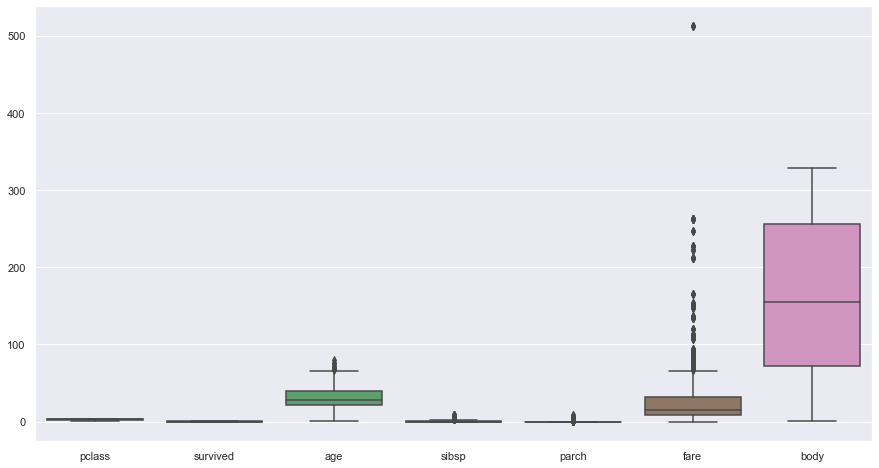

In [20]:
#create all the boxplots
sns.boxplot(data=titanic)

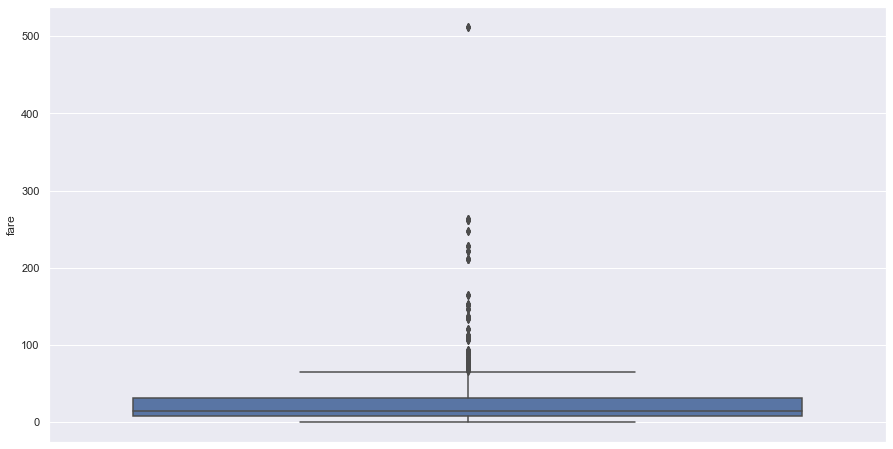

In [21]:
#create the that shows something boxplots

sns.boxplot(y=titanic['fare'])
plt.show()

/Users/joeldavis/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of fares on Titanic')

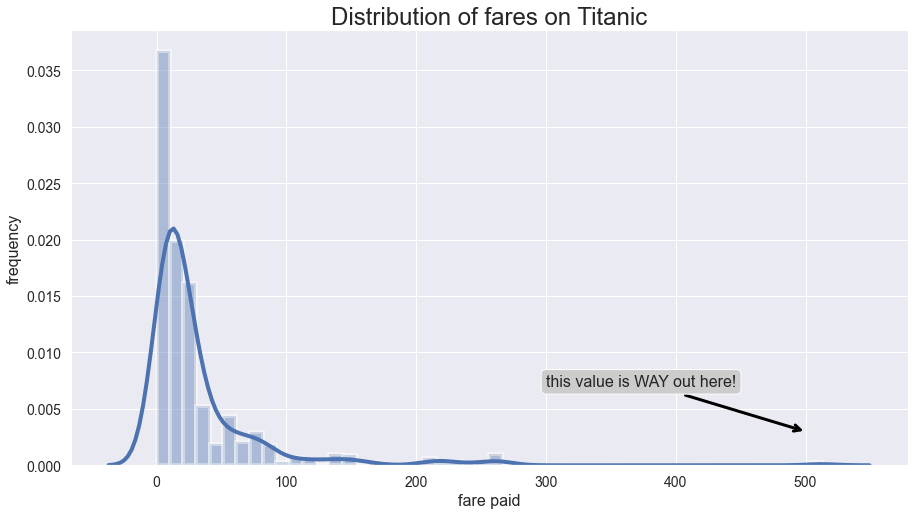

In [22]:
# histogram and kernel density estimation function of the variable height
ax = sns.distplot(titanic.fare, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 4}, kde_kws={"linewidth": 4}) 

# notation indicating a possible outlier
ax.annotate('this value is WAY out here!', 
            xy=(500,0.0030), 
            xytext=(300,0.0070), 
            fontsize=16, 
            arrowprops=dict(arrowstyle='->', 
                            ec='black', lw=3), 
            bbox = dict(boxstyle="round", fc="0.8")) 

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 

# labels and title

plt.xlabel('fare paid', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.title('Distribution of fares on Titanic', fontsize=24)

In [ ]:
#what to do?


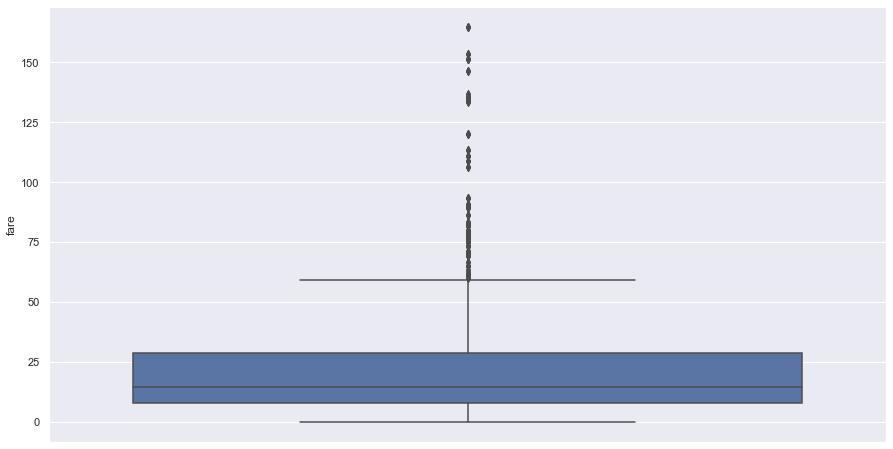

In [23]:
#replace with mean
mean = titanic.loc[titanic['fare'] < 200, 'fare'].mean()
titanic['fare'] = np.where(titanic['fare'] > 200, mean, titanic['fare'])

sns.boxplot(y=titanic['fare'])
plt.show()

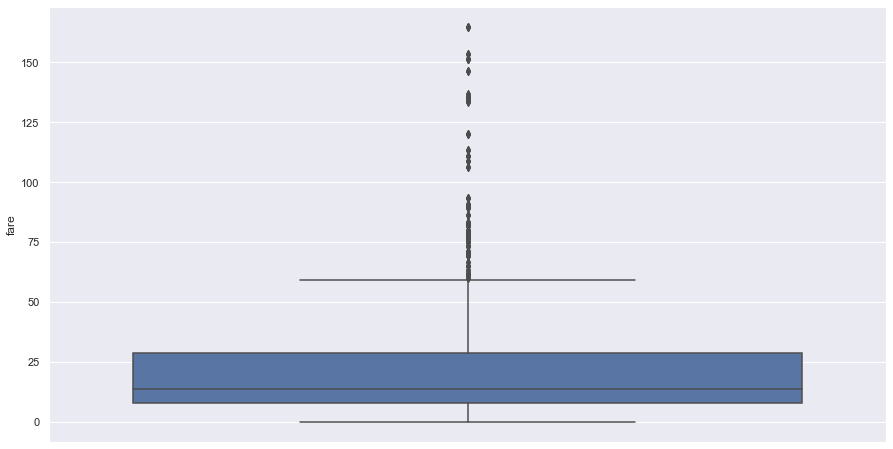

In [25]:
#replace with median
median = titanic.loc[titanic['fare'] < 200, 'fare'].median()
titanic['fare'] = np.where(titanic['fare'] > 200, median, titanic['fare'])

sns.boxplot(y=titanic['fare'])
plt.show()


/Users/joeldavis/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of fares on Titanic')

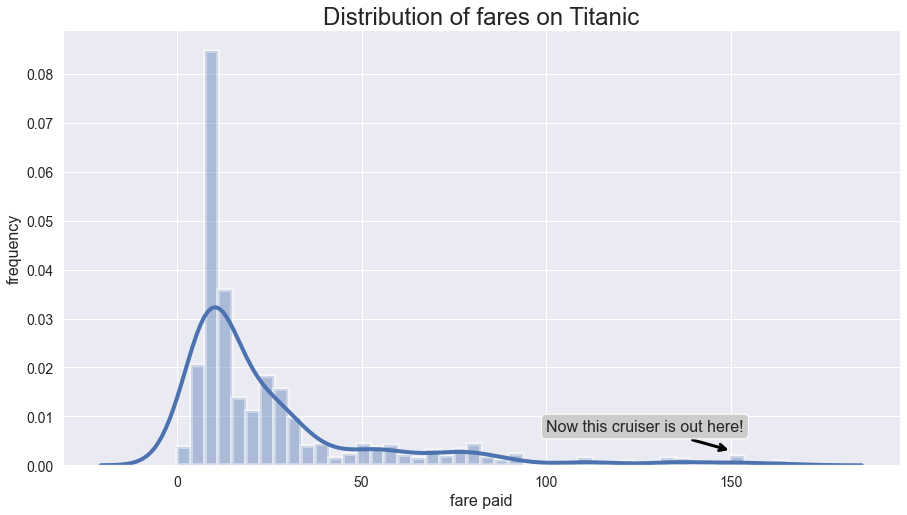

In [26]:
# histogram and kernel density estimation function of the variable height
ax = sns.distplot(titanic.fare, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 4}, kde_kws={"linewidth": 4}) 

# notation indicating a possible outlier
ax.annotate('Now this cruiser is out here!', 
            xy=(150,0.0030), 
            xytext=(100,0.0070), 
            fontsize=16, 
            arrowprops=dict(arrowstyle='->', 
                            ec='black', lw=3), 
            bbox = dict(boxstyle="round", fc="0.8")) 

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 

# labels and title

plt.xlabel('fare paid', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.title('Distribution of fares on Titanic', fontsize=24)